In [20]:
import datetime
import json
import logging
import os

from xcube.core.store import new_data_store
import numpy as np
from zappend.api import zappend


logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[logging.StreamHandler()]
)

LOG = logging.getLogger("MyLogger")

In [21]:
with open("cds-credentials.json") as f:
    credentials = json.load(f)

cds_store = new_data_store(
    "cds",
    **credentials,
    normalize_names=True,
)

In [22]:
store_team = new_data_store(
    "s3",
    root=os.environ["S3_USER_STORAGE_BUCKET"],
    max_depth=4,
    storage_options=dict(
        anon=False,
        key=os.environ["S3_USER_STORAGE_KEY"],
        secret=os.environ["S3_USER_STORAGE_SECRET"],
    ),
)

In [23]:
def get_time_ranges():
    years = np.arange(2016, 2025)
    months = np.arange(1, 13)
    time_ranges = []
    for year in years:
        for month in months:
            if year == 2016 and month < 11:
                continue
            start = f"{year}-{month:02d}-01"
            if month + 1 == 13:
                end_year = year + 1
                end_month = 1
            else:
                end_year = year
                end_month = month + 1
            end = f"{end_year}-{end_month:02d}-01"
            dt = datetime.date.fromisoformat(end)
            dt = dt - datetime.timedelta(days=1)
            end = dt.isoformat()
            time_ranges.append([start, end])
    return time_ranges

time_ranges = get_time_ranges()
time_ranges

[['2016-11-01', '2016-11-30'],
 ['2016-12-01', '2016-12-31'],
 ['2017-01-01', '2017-01-31'],
 ['2017-02-01', '2017-02-28'],
 ['2017-03-01', '2017-03-31'],
 ['2017-04-01', '2017-04-30'],
 ['2017-05-01', '2017-05-31'],
 ['2017-06-01', '2017-06-30'],
 ['2017-07-01', '2017-07-31'],
 ['2017-08-01', '2017-08-31'],
 ['2017-09-01', '2017-09-30'],
 ['2017-10-01', '2017-10-31'],
 ['2017-11-01', '2017-11-30'],
 ['2017-12-01', '2017-12-31'],
 ['2018-01-01', '2018-01-31'],
 ['2018-02-01', '2018-02-28'],
 ['2018-03-01', '2018-03-31'],
 ['2018-04-01', '2018-04-30'],
 ['2018-05-01', '2018-05-31'],
 ['2018-06-01', '2018-06-30'],
 ['2018-07-01', '2018-07-31'],
 ['2018-08-01', '2018-08-31'],
 ['2018-09-01', '2018-09-30'],
 ['2018-10-01', '2018-10-31'],
 ['2018-11-01', '2018-11-30'],
 ['2018-12-01', '2018-12-31'],
 ['2019-01-01', '2019-01-31'],
 ['2019-02-01', '2019-02-28'],
 ['2019-03-01', '2019-03-31'],
 ['2019-04-01', '2019-04-30'],
 ['2019-05-01', '2019-05-31'],
 ['2019-06-01', '2019-06-30'],
 ['2019-

In [24]:
# extract ERA5 from CDS
data_id = "reanalysis-era5-single-levels:reanalysis"
bbox = [-5, 40, 35, 65]
variable_names = [
    "2m_dewpoint_temperature",
    "evaporation",
    "potential_evaporation",
    "leaf_area_index_high_vegetation",
    "leaf_area_index_low_vegetation",
    "skin_temperature",
    "surface_latent_heat_flux",
    "surface_sensible_heat_flux",
    "surface_pressure",
    "mean_sea_level_pressure",
    "surface_net_solar_radiation",
    "surface_solar_radiation_downwards",
    "surface_net_thermal_radiation",
    "surface_thermal_radiation_downwards",
    "soil_temperature_level_1",
    "soil_temperature_level_2",
    "soil_temperature_level_3",
    "soil_temperature_level_4",
    "volumetric_soil_water_layer_1",
    "volumetric_soil_water_layer_2",
    "volumetric_soil_water_layer_3",
    "volumetric_soil_water_layer_4",
    "2m_temperature",
    "total_precipitation",
    "10m_u_component_of_neutral_wind",
    "10m_v_component_of_neutral_wind",
]

for time_range in time_ranges:
    print(time_range)
    ds = cds_store.open_data(
        data_id,
        "dataset:netcdf:cds",
        variable_names=variable_names,
        bbox=bbox,
        spatial_res=0.25,
        time_range=time_range,
    )
    file_name = time_range[0][:-3].replace("-", "_")
    store_team.write_data(ds, f"cubes/aux/era5_allvars/{file_name}.zarr", replace=True)
    print(f"ERS5 for {time_range} is written to {file_name}.zarr")

xcube-cds version 0.9.3
2025-02-13 10:02:38,594 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-02-13 10:02:38.594 INFO datapi.legacy_api_client legacy_api_client - log: [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-02-13 10:02:38,595 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-02-13 10:02:38.595 WARNING datapi.legacy_api_client legacy_api_client - log: [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for 

['2017-03-01', '2017-03-31']


2025-02-13 10:02:39,043 INFO Request ID is 053f5420-53de-4462-8e62-2acac876ebd3
2025-02-13 10:02:39.043 INFO datapi.legacy_api_client legacy_api_client - log: Request ID is 053f5420-53de-4462-8e62-2acac876ebd3
2025-02-13 10:02:39,094 INFO status has been updated to accepted
2025-02-13 10:02:39.094 INFO datapi.legacy_api_client legacy_api_client - log: status has been updated to accepted
2025-02-13 10:27:01,018 INFO status has been updated to successful
2025-02-13 10:27:01.018 INFO datapi.legacy_api_client legacy_api_client - log: status has been updated to successful
2025-02-13 10:27:01.114 INFO multiurl.base base - download: Downloading https://object-store.os-api.cci2.ecmwf.int:443/cci2-prod-cache/675a06d1ded250a1fcc237a509a0f037.zip


675a06d1ded250a1fcc237a509a0f037.zip:   0%|          | 0.00/488M [00:00<?, ?B/s]

xcube-cds version 0.9.3
2025-02-13 10:27:49,001 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-02-13 10:27:49.001 INFO datapi.legacy_api_client legacy_api_client - log: [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-02-13 10:27:49,003 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-02-13 10:27:49.003 WARNING datapi.legacy_api_client legacy_api_client - log: [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for 

ERS5 for ['2017-03-01', '2017-03-31'] is written to 2017_03.zarr
['2019-02-01', '2019-02-28']


2025-02-13 10:27:49,322 INFO Request ID is c44a1582-33cc-4345-82ce-fe5ddc495e4e
2025-02-13 10:27:49.322 INFO datapi.legacy_api_client legacy_api_client - log: Request ID is c44a1582-33cc-4345-82ce-fe5ddc495e4e
2025-02-13 10:27:49,390 INFO status has been updated to accepted
2025-02-13 10:27:49.390 INFO datapi.legacy_api_client legacy_api_client - log: status has been updated to accepted
2025-02-13 10:29:43,227 INFO status has been updated to successful
2025-02-13 10:29:43.227 INFO datapi.legacy_api_client legacy_api_client - log: status has been updated to successful
2025-02-13 10:29:43.312 INFO multiurl.base base - download: Downloading https://object-store.os-api.cci2.ecmwf.int:443/cci2-prod-cache/2fe59569d525c4a10049d37c9239283a.zip


2fe59569d525c4a10049d37c9239283a.zip:   0%|          | 0.00/433M [00:00<?, ?B/s]

xcube-cds version 0.9.3
2025-02-13 10:30:27,101 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-02-13 10:30:27.101 INFO datapi.legacy_api_client legacy_api_client - log: [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-02-13 10:30:27,102 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-02-13 10:30:27.102 WARNING datapi.legacy_api_client legacy_api_client - log: [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for 

ERS5 for ['2019-02-01', '2019-02-28'] is written to 2019_02.zarr
['2019-11-01', '2019-11-30']


2025-02-13 10:30:44,191 INFO Request ID is 5dcfa031-5b65-4edd-be61-ca810231df7d
2025-02-13 10:30:44.191 INFO datapi.legacy_api_client legacy_api_client - log: Request ID is 5dcfa031-5b65-4edd-be61-ca810231df7d
2025-02-13 10:30:44,245 INFO status has been updated to accepted
2025-02-13 10:30:44.245 INFO datapi.legacy_api_client legacy_api_client - log: status has been updated to accepted
2025-02-13 10:43:03,829 INFO status has been updated to successful
2025-02-13 10:43:03.829 INFO datapi.legacy_api_client legacy_api_client - log: status has been updated to successful
2025-02-13 10:43:03.948 INFO multiurl.base base - download: Downloading https://object-store.os-api.cci2.ecmwf.int:443/cci2-prod-cache/94305781a6537eb4c26161c23f8d8616.zip


94305781a6537eb4c26161c23f8d8616.zip:   0%|          | 0.00/481M [00:00<?, ?B/s]

xcube-cds version 0.9.3
2025-02-13 10:43:57,163 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-02-13 10:43:57.163 INFO datapi.legacy_api_client legacy_api_client - log: [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-02-13 10:43:57,164 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-02-13 10:43:57.164 WARNING datapi.legacy_api_client legacy_api_client - log: [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for 

ERS5 for ['2019-11-01', '2019-11-30'] is written to 2019_11.zarr
['2020-02-01', '2020-02-29']


2025-02-13 10:43:57,426 INFO Request ID is f80e025b-3d17-48d5-a812-f006492271b0
2025-02-13 10:43:57.426 INFO datapi.legacy_api_client legacy_api_client - log: Request ID is f80e025b-3d17-48d5-a812-f006492271b0
2025-02-13 10:43:57,471 INFO status has been updated to accepted
2025-02-13 10:43:57.471 INFO datapi.legacy_api_client legacy_api_client - log: status has been updated to accepted
2025-02-13 10:54:16,282 INFO status has been updated to successful
2025-02-13 10:54:16.282 INFO datapi.legacy_api_client legacy_api_client - log: status has been updated to successful
2025-02-13 10:54:16.407 INFO multiurl.base base - download: Downloading https://object-store.os-api.cci2.ecmwf.int:443/cci2-prod-cache/eaa251164cd800e18707e91a79d44689.zip


eaa251164cd800e18707e91a79d44689.zip:   0%|          | 0.00/447M [00:00<?, ?B/s]

xcube-cds version 0.9.3
2025-02-13 10:55:05,889 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-02-13 10:55:05.889 INFO datapi.legacy_api_client legacy_api_client - log: [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-02-13 10:55:05,891 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-02-13 10:55:05.891 WARNING datapi.legacy_api_client legacy_api_client - log: [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for 

ERS5 for ['2020-02-01', '2020-02-29'] is written to 2020_02.zarr
['2021-01-01', '2021-01-31']


2025-02-13 10:55:06,163 INFO Request ID is b74e5803-6930-4785-95af-212cc52a583f
2025-02-13 10:55:06.163 INFO datapi.legacy_api_client legacy_api_client - log: Request ID is b74e5803-6930-4785-95af-212cc52a583f
2025-02-13 10:55:06,212 INFO status has been updated to accepted
2025-02-13 10:55:06.212 INFO datapi.legacy_api_client legacy_api_client - log: status has been updated to accepted
2025-02-13 11:01:24,938 INFO status has been updated to successful
2025-02-13 11:01:24.938 INFO datapi.legacy_api_client legacy_api_client - log: status has been updated to successful
2025-02-13 11:01:25.858 INFO multiurl.base base - download: Downloading https://object-store.os-api.cci2.ecmwf.int:443/cci2-prod-cache/794b5da980daa39b588a98dd7618c875.zip


794b5da980daa39b588a98dd7618c875.zip:   0%|          | 0.00/485M [00:00<?, ?B/s]

ERS5 for ['2021-01-01', '2021-01-31'] is written to 2021_01.zarr


In [25]:
data_ids = store_team.list_data_ids()
data_ids = [data_id for data_id in data_ids if "cubes/aux/era5_allvars/" in data_id]
data_ids

['cubes/aux/era5_allvars/2016_11.zarr',
 'cubes/aux/era5_allvars/2016_12.zarr',
 'cubes/aux/era5_allvars/2017_01.zarr',
 'cubes/aux/era5_allvars/2017_02.zarr',
 'cubes/aux/era5_allvars/2017_03.zarr',
 'cubes/aux/era5_allvars/2017_04.zarr',
 'cubes/aux/era5_allvars/2017_05.zarr',
 'cubes/aux/era5_allvars/2017_06.zarr',
 'cubes/aux/era5_allvars/2017_07.zarr',
 'cubes/aux/era5_allvars/2017_08.zarr',
 'cubes/aux/era5_allvars/2017_09.zarr',
 'cubes/aux/era5_allvars/2017_10.zarr',
 'cubes/aux/era5_allvars/2017_11.zarr',
 'cubes/aux/era5_allvars/2017_12.zarr',
 'cubes/aux/era5_allvars/2018_01.zarr',
 'cubes/aux/era5_allvars/2018_02.zarr',
 'cubes/aux/era5_allvars/2018_03.zarr',
 'cubes/aux/era5_allvars/2018_04.zarr',
 'cubes/aux/era5_allvars/2018_05.zarr',
 'cubes/aux/era5_allvars/2018_06.zarr',
 'cubes/aux/era5_allvars/2018_07.zarr',
 'cubes/aux/era5_allvars/2018_08.zarr',
 'cubes/aux/era5_allvars/2018_09.zarr',
 'cubes/aux/era5_allvars/2018_10.zarr',
 'cubes/aux/era5_allvars/2018_11.zarr',


In [26]:
# open dataset and check for nan values
for data_id in data_ids:
    LOG.info(f"Checking {data_id}")
    ds = store_team.open_data(data_id)
    for var in ds.data_vars:
        vals = ds[var].values
        nans = vals[np.isnan(vals)]
        if nans.size > 0:
            LOG.info(
                f"{data_id} has {nans.size} nan"
                f"values for variable name {var}."
            )

2025-02-13 11:06:39.135 INFO MyLogger 3087465861 - <module>: Checking cubes/aux/era5_allvars/2016_11.zarr
2025-02-13 11:06:58.897 INFO MyLogger 3087465861 - <module>: Checking cubes/aux/era5_allvars/2016_12.zarr
2025-02-13 11:07:21.189 INFO MyLogger 3087465861 - <module>: Checking cubes/aux/era5_allvars/2017_01.zarr
2025-02-13 11:07:41.636 INFO MyLogger 3087465861 - <module>: Checking cubes/aux/era5_allvars/2017_02.zarr
2025-02-13 11:07:49.564 INFO MyLogger 3087465861 - <module>: cubes/aux/era5_allvars/2017_02.zarr has 8 nanvalues for variable name sshf.
2025-02-13 11:08:00.036 INFO MyLogger 3087465861 - <module>: Checking cubes/aux/era5_allvars/2017_03.zarr
2025-02-13 11:08:06.413 INFO MyLogger 3087465861 - <module>: cubes/aux/era5_allvars/2017_03.zarr has 2 nanvalues for variable name slhf.
2025-02-13 11:08:19.123 INFO MyLogger 3087465861 - <module>: Checking cubes/aux/era5_allvars/2017_04.zarr
2025-02-13 11:08:38.864 INFO MyLogger 3087465861 - <module>: Checking cubes/aux/era5_allva

In [27]:
ds = store_team.open_data(data_ids[0])
ds

<xarray.Dataset> Size: 1GB
Dimensions:  (time: 720, lat: 100, lon: 160)
Coordinates:
    expver   (time) <U4 12kB dask.array<chunksize=(720,), meta=np.ndarray>
  * lat      (lat) float64 800B 64.88 64.62 64.38 64.12 ... 40.62 40.38 40.12
  * lon      (lon) float64 1kB -4.875 -4.625 -4.375 -4.125 ... 34.38 34.62 34.88
    number   int64 8B ...
  * time     (time) datetime64[ns] 6kB 2016-11-01 ... 2016-11-30T23:00:00
Data variables: (12/26)
    d2m      (time, lat, lon) float32 46MB dask.array<chunksize=(360, 50, 80), meta=np.ndarray>
    e        (time, lat, lon) float32 46MB dask.array<chunksize=(360, 50, 80), meta=np.ndarray>
    lai_hv   (time, lat, lon) float32 46MB dask.array<chunksize=(360, 50, 80), meta=np.ndarray>
    lai_lv   (time, lat, lon) float32 46MB dask.array<chunksize=(360, 50, 80), meta=np.ndarray>
    msl      (time, lat, lon) float32 46MB dask.array<chunksize=(360, 50, 80), meta=np.ndarray>
    pev      (time, lat, lon) float32 46MB dask.array<chunksize=(360, 50, 80), meta=np.ndarray>
    ...       ...
    swvl3    (time, lat, lon) float32 46MB dask.array<chunksize=(360, 50, 80), meta=np.ndarray>
    swvl4    (time, lat, lon) float32 46MB dask.array<chunksize=(360, 50, 80), meta=np.ndarray>
    t2m      (time, lat, lon) float32 46MB dask.array<chunksize=(360, 50, 80), meta=np.ndarray>
    tp       (time, lat, lon) float32 46MB dask.array<chunksize=(360, 50, 80), meta=np.ndarray>
    u10n     (time, lat, lon) float32 46MB dask.array<chunksize=(360, 50, 80), meta=np.ndarray>
    v10n     (time, lat, lon) float32 46MB dask.array<chunksize=(360, 50, 80), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    history:                 2025-02-11T12:20 GRIB to CDM+CF via cfgrib-0.9.1...
    institution:             European Centre for Medium-Range Weather Forecasts

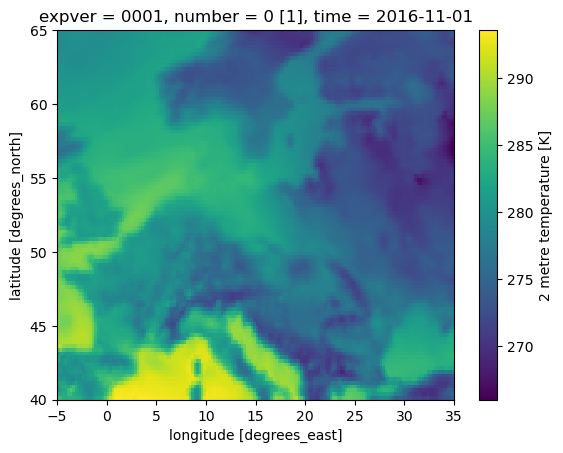

In [28]:
ds.t2m.isel(time=0).plot()

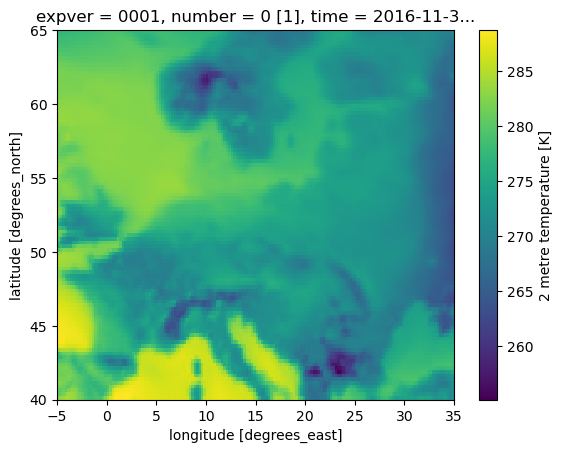

In [29]:
ds.t2m.isel(time=-1).plot()

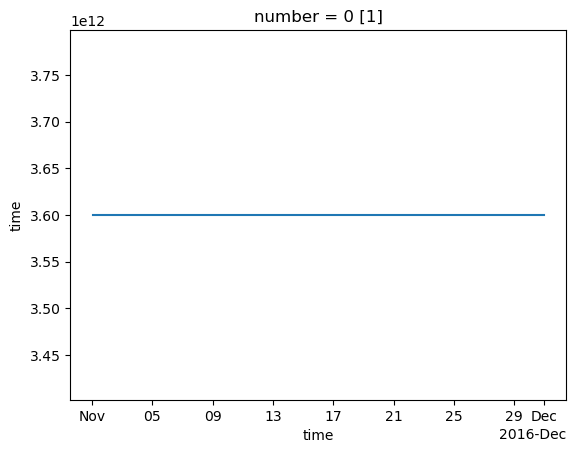

In [30]:
ds.time.diff("time").plot()